<a href="https://colab.research.google.com/github/Deepak1developer/Deepak1developer/blob/main/extract_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
rides = pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(rides)

     City Product Type Trip or Order Status                   Request Time  \
0     458        Black            COMPLETED  2021-01-13 22:06:46 +0000 UTC   
1     458          VIP            COMPLETED  2021-01-13 20:21:05 +0000 UTC   
2     458          VIP            COMPLETED  2021-01-03 00:23:22 +0000 UTC   
3     458          VIP            COMPLETED  2020-12-11 23:16:33 +0000 UTC   
4     458          VIP            COMPLETED  2020-12-11 00:35:46 +0000 UTC   
..    ...          ...                  ...                            ...   
549   458         POOL            COMPLETED  2016-06-22 11:07:02 +0000 UTC   
550   458        uberX            COMPLETED  2016-04-07 00:30:46 +0000 UTC   
551   458        uberX            COMPLETED  2016-04-06 21:16:52 +0000 UTC   
552   458        uberX             CANCELED  2016-04-06 21:12:03 +0000 UTC   
553   458        uberX             CANCELED  2015-12-17 23:52:50 +0000 UTC   

                   Begin Trip Time  Begin Trip Lat  Begin Trip 

In [ ]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [ ]:
rides.rename(columns={'Trip or Order Status': 'status', 'Request Time': 'request_time','Product Type':'product_type','Begin Trip Time':'begin_time',
                      'Begin Trip Lat':'begin_lat','Begin Trip Lng':'begin_lng','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat',
                      'Dropoff Lng':'dropoff_lng','Distance (miles)':'distance_miles','Fare Amount':'fare_amount',
                      'Fare Currency':'fare_currency','City':'city'}, inplace=True)

In [ ]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,fare_currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


                count  mean   std  min  25%   50%   75%   max
distance_miles  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
fare_amount     544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


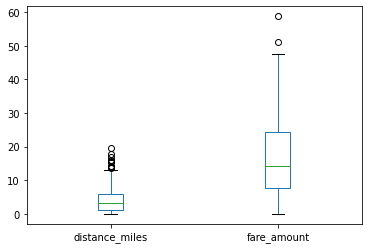

In [ ]:
df1 = rides[rides.product_type!='UberEATS Marketplace'][['distance_miles','fare_amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

In [ ]:

rides.pop('fare_currency');

In [ ]:

rides.isnull().sum().sort_values(ascending=False)

begin_lat         29
begin_lng         29
dropoff_lat       29
dropoff_lng       29
product_type       3
city               0
status             0
request_time       0
begin_time         0
dropoff_time       0
distance_miles     0
fare_amount        0
dtype: int64

In [ ]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


In [ ]:

rides.dropna(subset = ['product_type'], inplace=True)

In [ ]:
# Checking categories in product_type column
print(rides.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

# New categories replacement
rides['product_type'].replace(product_mapping, inplace=True)

# Checking new categories in product_type column
print(rides.product_type.value_counts())

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: product_type, dtype: int64
UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64


In [ ]:

rides = rides[rides.product_type!='UberEATS Marketplace']

In [ ]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

In [ ]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

In [ ]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

In [ ]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

In [ ]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [ ]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))


In [ ]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

In [ ]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')] 


Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


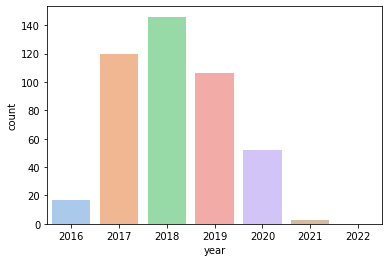

In [ ]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021','2022'], palette='pastel')